In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
#import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from xgboost import XGBClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("/Users/vireshdevgan/Documents/py_repository/Data_set/Kaggle/E_Commerce_churn.xlsx" , sheet_name="E Comm")

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [47]:
df.shape
df.info()
df.Churn.value_counts()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [48]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [52]:
    import pandas as pd
    dff = pd.DataFrame({'col1': [1, 2, 3]})
    dff['new_col'] = dff['col1'].apply(lambda x: x * 3)

In [53]:
dff.head()

,col1,new_col
0,1,3
1,2,6
2,3,9


In [25]:
df.groupby(['PreferredPaymentMode','CityTier'])['CustomerID'].count() #.sort_values(ascending=False)

PreferredPaymentMode  CityTier
CC                    1            235
                      2             12
                      3             26
COD                   1            260
                      2             16
                      3             89
Cash on Delivery      1            106
                      3             43
Credit Card           1           1147
                      2             38
                      3            316
Debit Card            1           1676
                      2             62
                      3            576
E wallet              3            614
UPI                   1            242
                      2            114
                      3             58
Name: CustomerID, dtype: int64

In [81]:
for i in range(df.shape[1])

SyntaxError: expected ':' (2274777453.py, line 1)

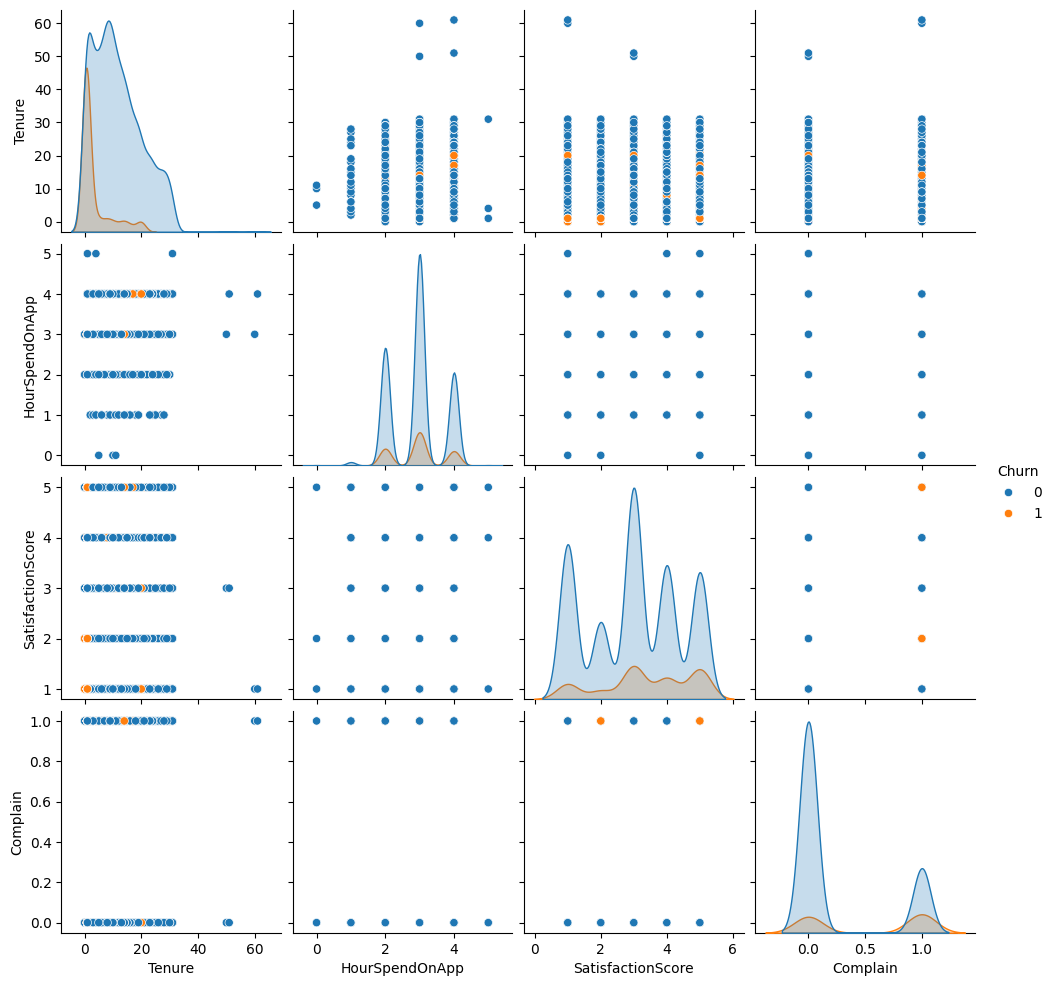

In [8]:
pairplot=df[['Tenure','HourSpendOnApp','SatisfactionScore','Complain','Churn']]

sns.pairplot(pairplot, hue='Churn')
plt.show()

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


In [37]:
#df.isnull().sum()
#df.duplicated().sum()

np.int64(0)

In [38]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [57]:
df.drop(columns =['CustomerID'], inplace=True)
df.shape

(5630, 19)

EDA

In [58]:
count_col=[]
hist_col=[]
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)
        

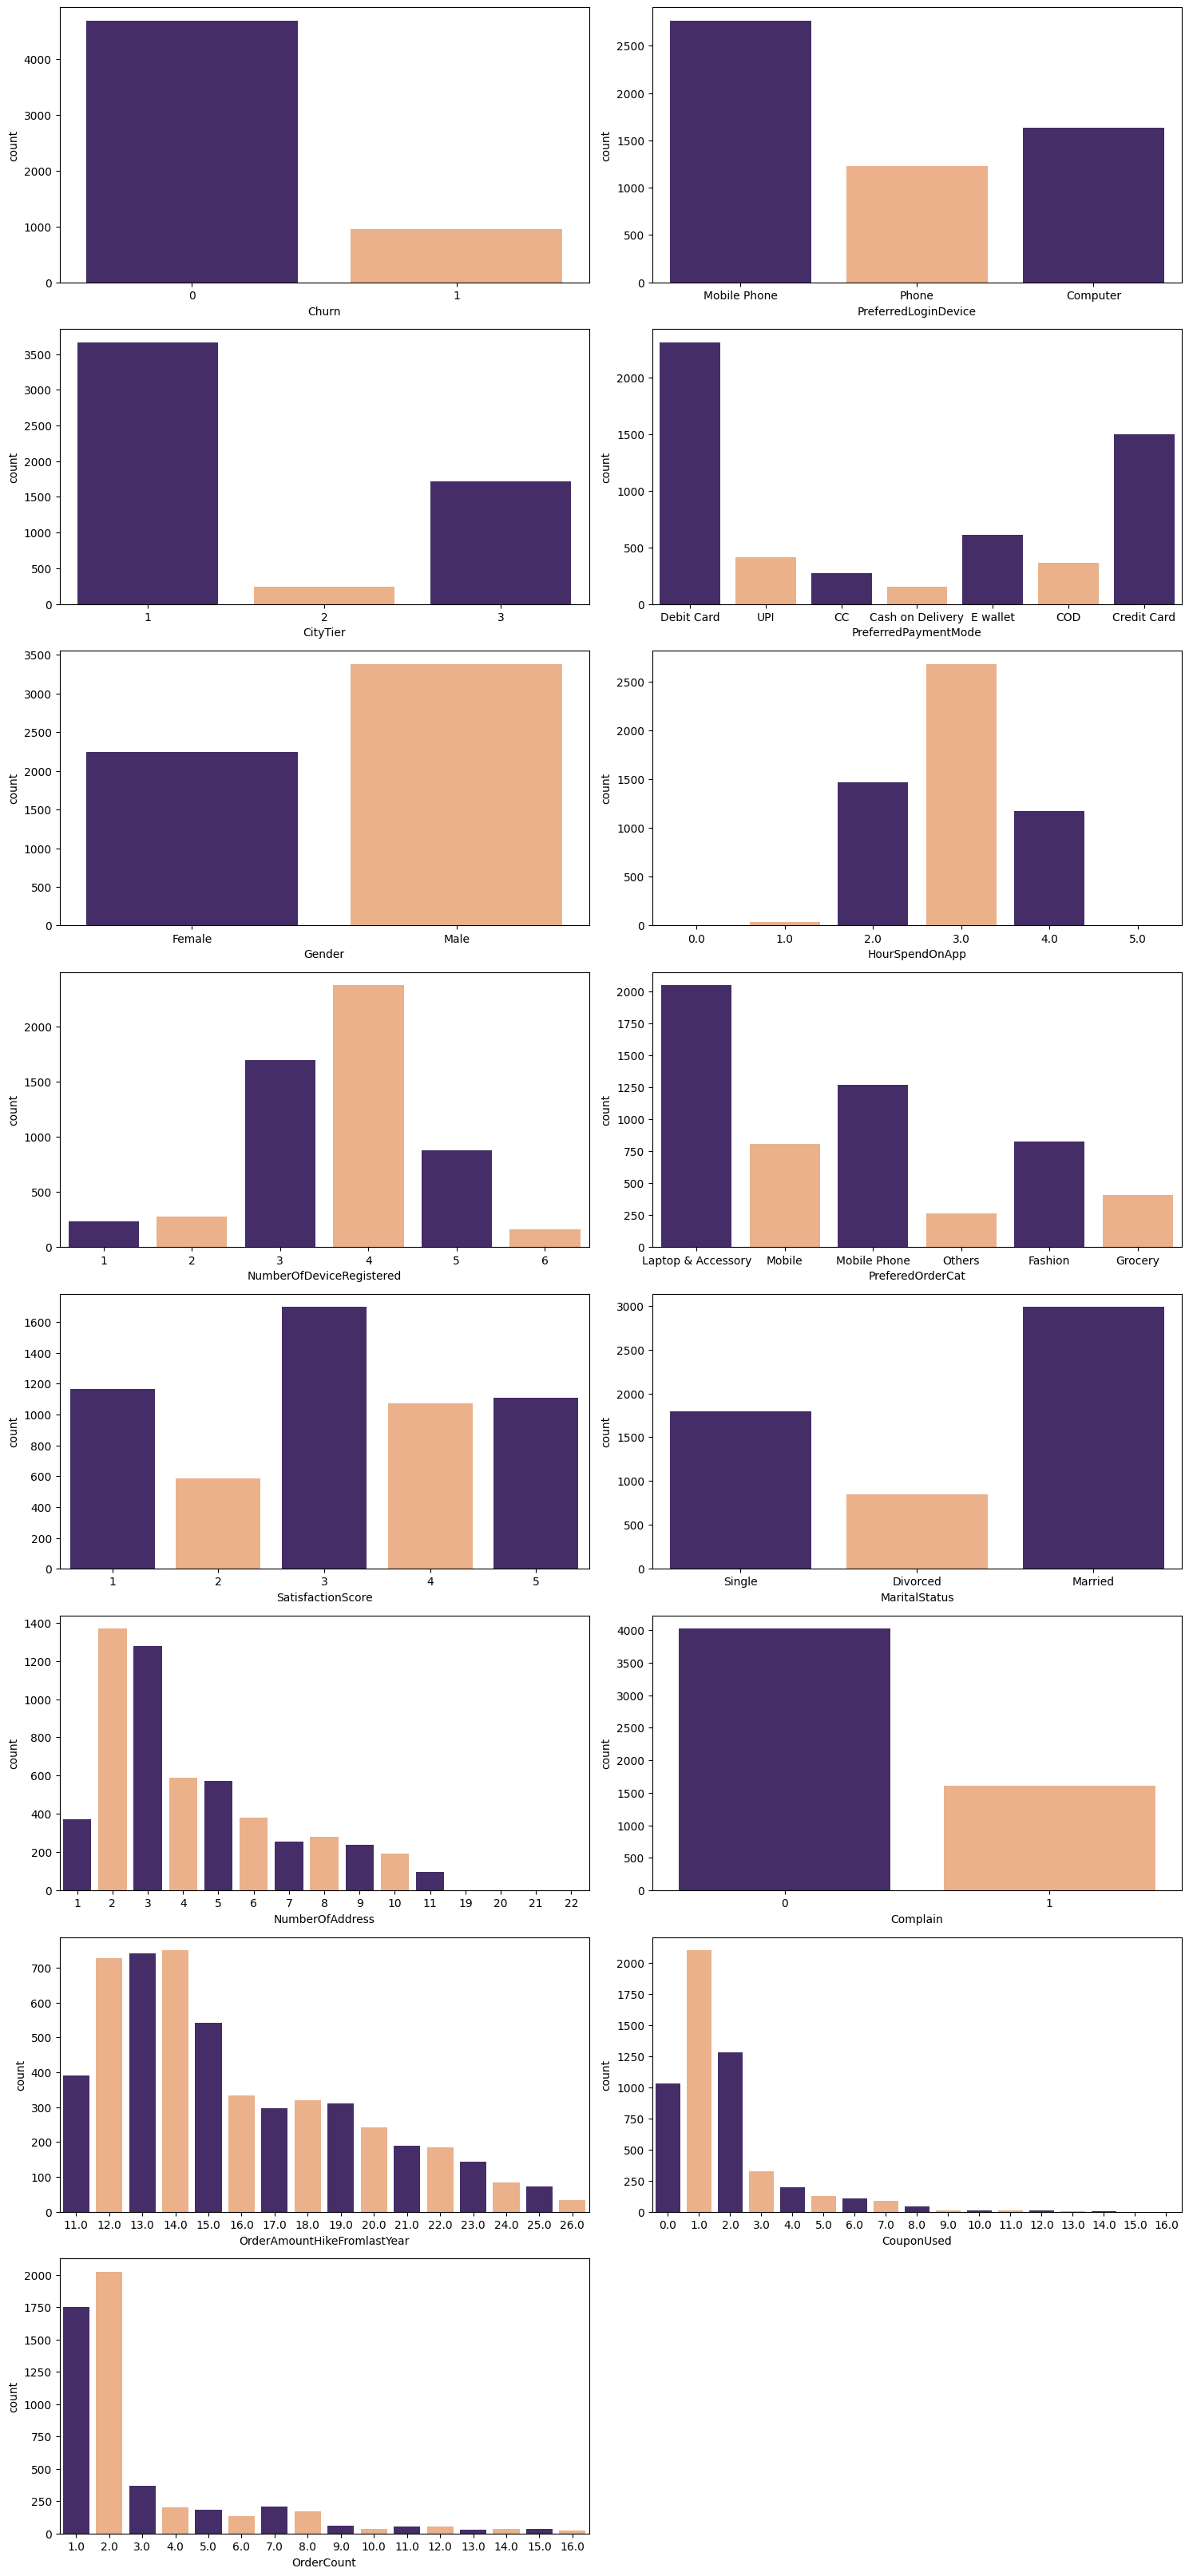

In [59]:
plt.figure(figsize=(15,40))
plot_num=1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df , x=col , palette=['#432371',"#FAAE7B"]) # palette=['#432371',"#FAAE7B"]
    plot_num +=1
    plt.tight_layout()

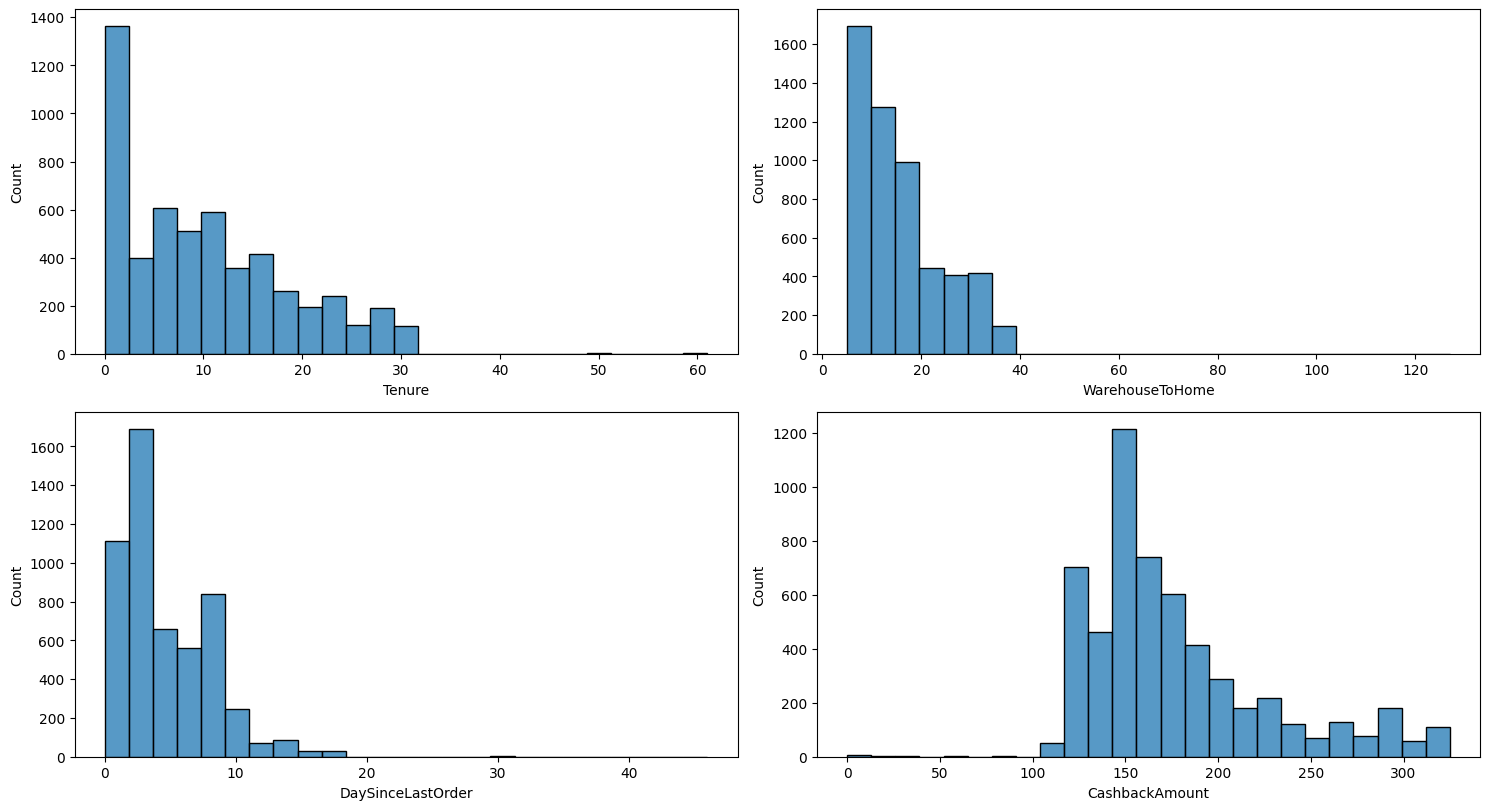

In [60]:
plt.figure(figsize=(15,40))
num_col=1
for col in hist_col:
    plt.subplot(10,2, num_col)
    sns.histplot(data=df, x=col,bins=25,palette=['#432371',"#FAAE7B"])
    num_col +=1
    plt.tight_layout()

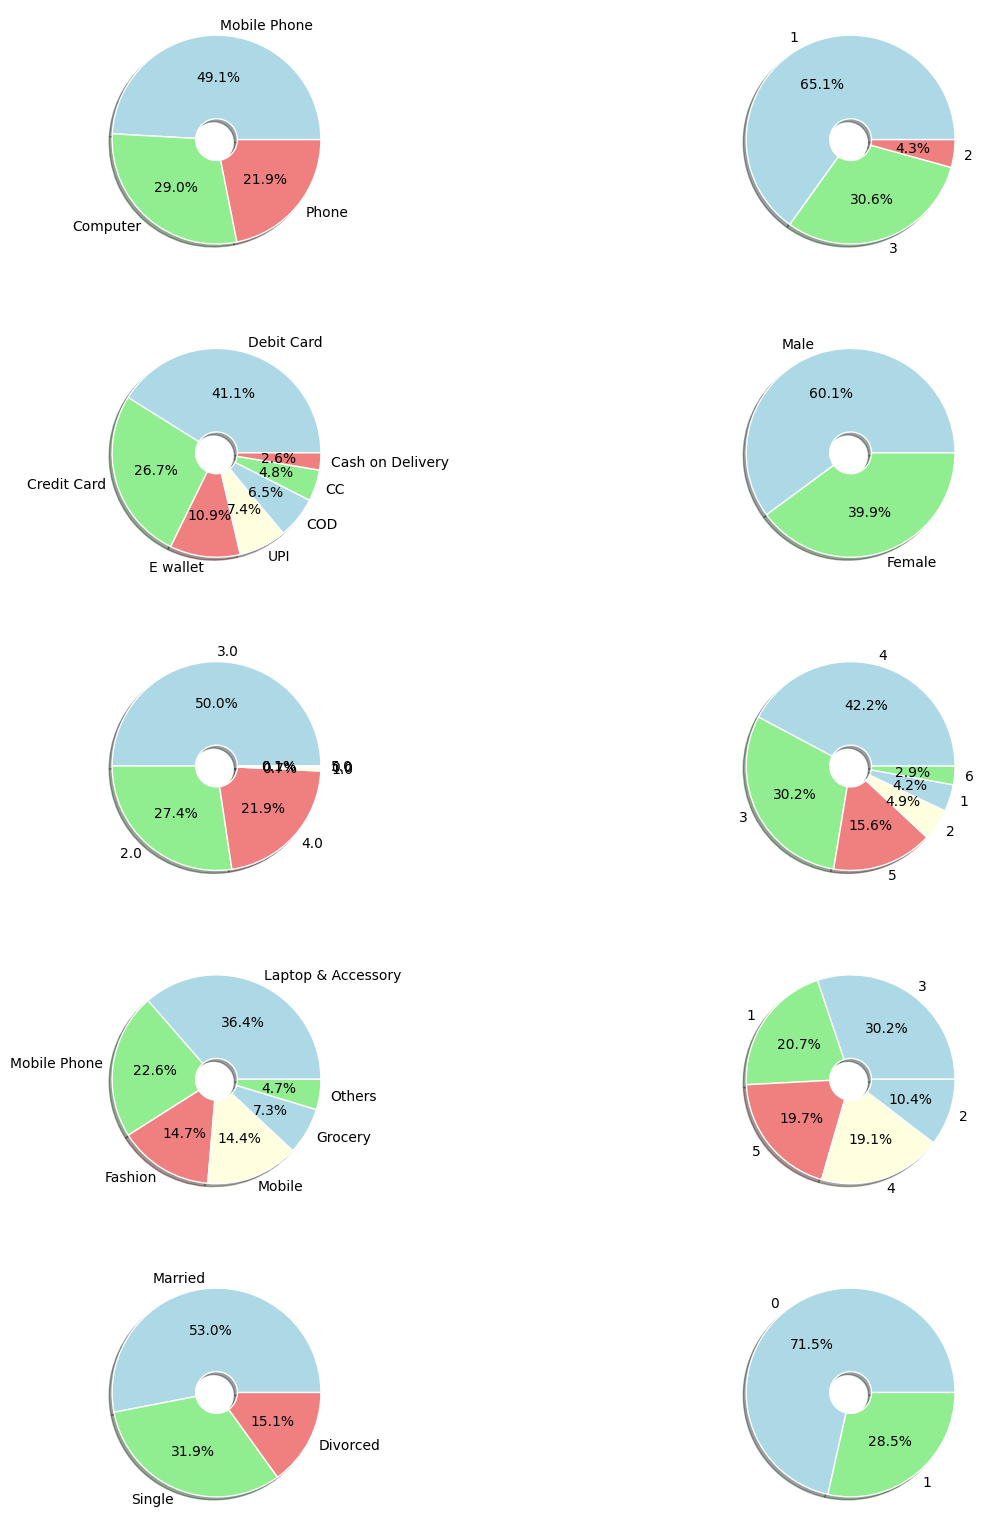

In [61]:

plt.figure(figsize=(15,40))
plot_num=1
for col in count_col:
    if df[col].nunique() <= 8 and col != 'Churn':
        
        plt.subplot(10,2,plot_num)
        plt.pie(data = df , x=df[col].value_counts().values , labels=df[col].value_counts().index, shadow=True,autopct='%1.1f%%',  
        colors=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'], wedgeprops=dict(width=0.8,edgecolor="w"))
        plt.title=col
        plot_num +=1
        plt.tight_layout

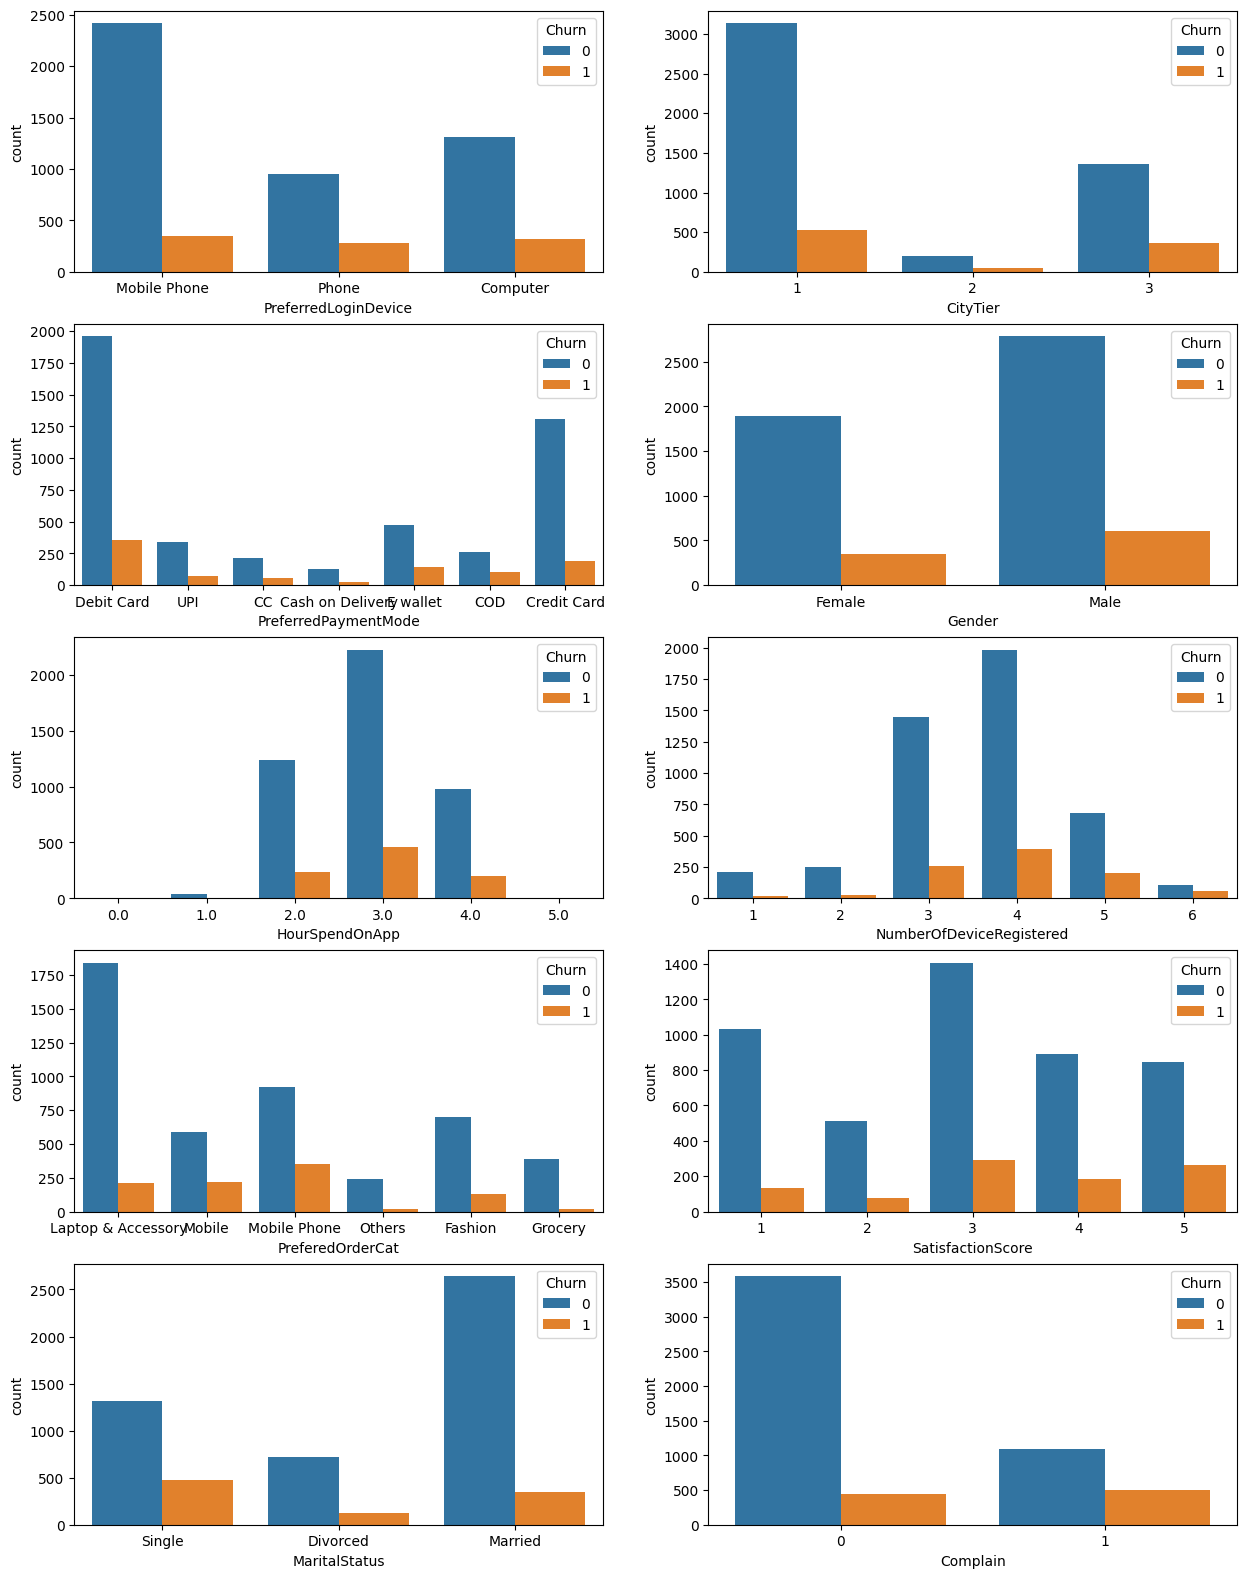

In [62]:
plt.figure(figsize=(15,40))
plot_num=1
for col in count_col:
    if df[col].nunique() <= 8 and col != 'Churn':
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue='Churn')
        plot_num +=1
        plt.tight_layout
        

In [63]:
cat_col = df.select_dtypes(include="O")
cat_col.columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [100]:
df.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [64]:
x=df.drop(columns=['Churn'], axis=1)
y=df['Churn'] 

In [65]:
cat_col=x.select_dtypes(include="O").columns
num_col=[]
for col in x.columns:
    if col not in cat_col:
        num_col.append(col)


In [66]:
categorical_col = Pipeline(steps=[
    ('Imputer', SimpleImputer(strategy="most_frequent")),
    ('Encoder', OneHotEncoder())
     ])


In [67]:
numerical_col=Pipeline(steps=[
    ('Imputer',SimpleImputer(strategy="mean")),
    ('Encoder',StandardScaler())
])

In [68]:
transformer=ColumnTransformer(transformers=[
    ('categorical',categorical_col, cat_col),
    ('Numerical', numerical_col, num_col)
])


In [69]:
xgboost =XGBClassifier()
#ml= SVC()
#logit = LogisticRegression()

In [70]:
model=Pipeline([
    ('Transformer',transformer),
    ('Classfier', xgboost)
])

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=20)

In [72]:
model.fit(x_train,y_train)

Pipeline(steps=[('Transformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')),
                                                 ('Numerical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [73]:
y_test_pred=model.predict(x_test)

Accuracy : 
 0.9796 
Confusion Metrics : 
 [[928   5]
 [ 18 175]] 


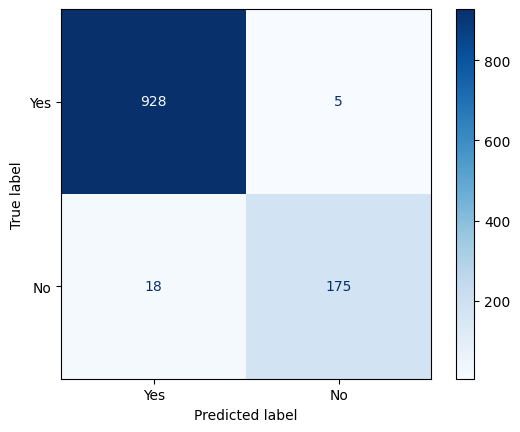

In [74]:
print(f"Accuracy : \n {accuracy_score(y_test,y_test_pred):.4f} ")
print (f"Confusion Metrics : \n {confusion_matrix(y_test,y_test_pred )} ") 
con_met = confusion_matrix(y_test,y_test_pred )
dis = ConfusionMatrixDisplay(con_met, display_labels=['Yes','No'])
dis.plot(cmap='Blues')

#Accuracy : 0.9795737122557726 

In [42]:
print(model[:-1].get_feature_names_out())

['categorical__PreferredLoginDevice_Computer'
 'categorical__PreferredLoginDevice_Mobile Phone'
 'categorical__PreferredLoginDevice_Phone'
 'categorical__PreferredPaymentMode_CC'
 'categorical__PreferredPaymentMode_COD'
 'categorical__PreferredPaymentMode_Cash on Delivery'
 'categorical__PreferredPaymentMode_Credit Card'
 'categorical__PreferredPaymentMode_Debit Card'
 'categorical__PreferredPaymentMode_E wallet'
 'categorical__PreferredPaymentMode_UPI' 'categorical__Gender_Female'
 'categorical__Gender_Male' 'categorical__PreferedOrderCat_Fashion'
 'categorical__PreferedOrderCat_Grocery'
 'categorical__PreferedOrderCat_Laptop & Accessory'
 'categorical__PreferedOrderCat_Mobile'
 'categorical__PreferedOrderCat_Mobile Phone'
 'categorical__PreferedOrderCat_Others'
 'categorical__MaritalStatus_Divorced'
 'categorical__MaritalStatus_Married' 'categorical__MaritalStatus_Single'
 'Numerical__Tenure' 'Numerical__CityTier' 'Numerical__WarehouseToHome'
 'Numerical__HourSpendOnApp' 'Numerical__

In [75]:
#rfc =RandomForestClassifier()
logit =LogisticRegression()

In [44]:
model=Pipeline([
    ('Transformer',transformer),
    ('Classfier', rfc)
])
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.20, random_state=20)

Accuracy : 
 0.8845 
Confusion Metrics : 
 [[896  37]
 [ 93 100]] 


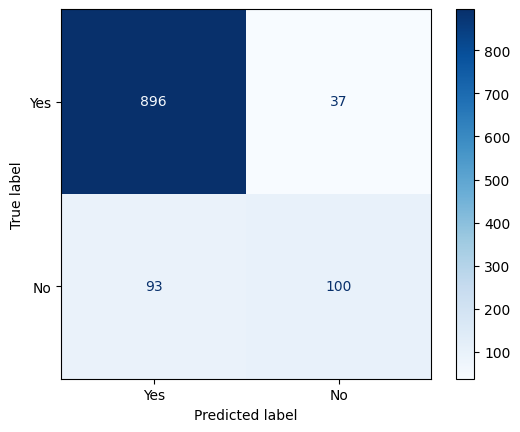

In [45]:
model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)
print(f"Accuracy : \n {accuracy_score(y_test,y_test_pred):.4f} ")
print (f"Confusion Metrics : \n {confusion_matrix(y_test,y_test_pred )} ") 
con_met = confusion_matrix(y_test,y_test_pred )
dis = ConfusionMatrixDisplay(con_met, display_labels=['Yes','No'])
dis.plot(cmap='Blues')
                             

In [78]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tenure                       5366 non-null   float64
 1   PreferredLoginDevice         5630 non-null   object 
 2   CityTier                     5630 non-null   int64  
 3   WarehouseToHome              5379 non-null   float64
 4   PreferredPaymentMode         5630 non-null   object 
 5   Gender                       5630 non-null   object 
 6   HourSpendOnApp               5375 non-null   float64
 7   NumberOfDeviceRegistered     5630 non-null   int64  
 8   PreferedOrderCat             5630 non-null   object 
 9   SatisfactionScore            5630 non-null   int64  
 10  MaritalStatus                5630 non-null   object 
 11  NumberOfAddress              5630 non-null   int64  
 12  Complain                     5630 non-null   int64  
 13  OrderAmountHikeFro

In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

stratified_kfold = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)


accuracy_mean=[]
precision_mean=[]
recall_mean=[]

for train_index, test_index in stratified_kfold.split(x,y):
    x_train, x_test = x.iloc[train_index] , x.iloc[test_index]
    y_train, y_test = y.iloc[train_index] , y.iloc[test_index]

    # fit the model
    logit.fit(x_train,y_train)
    # predict the model
    logit_predict = logit.predict(x_test)

    #calculate the accuracy
    accuracy_score(y_test,logit_predict)
    precision_score(y_test, logit_predict)
    recall_score(y_test,logit_predict)

    accuracy_mean.append(accuracy_score)
    precision_mean.append(precision_score)
    recall_mean.append(recall_score)

accuracy_score = np.mean(accuracy_mean)
precision_score = np.mean(precision_mean)
recall_score = np.mean(recall_mean)

print(f"Mean of Accuracy Score : {accuracy_score:.4f}")
print(f"Mean of Precision : {precision_score : .4f}")
print (f"Mean of Recall : {recall_score:.4f}")


ValueError: could not convert string to float: 'Mobile Phone'

In [229]:
#grid_param = {'C':[1,10,100,1000,10000],'kernel':['linear','rbf','sigmoid'], 'gamma':[1,.1,.01,.001,.0001], }

grid_param = {
    'n_estimators' : [50], #np.arange(50,250,50),
    'learning_rate' : [.09], #np.linspace(.01,.09 ,10),
    'max_depth' :[20], # np.arange(5,25,5),
    'min_child_weight': [1],
    'subsample': [.9],
    'colsample_bytree': [1],
    'lambda':[1]

}
"""

param_grid = {
    'n_estimators': [350],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
"""

"\n\nparam_grid = {\n    'n_estimators': [350],\n    'max_depth': [3, 5, 7],\n    'learning_rate': [0.01, 0.1, 0.3],\n    'subsample': [0.8, 1],\n    'colsample_bytree': [0.8, 1]\n}\n"

In [208]:
ml= SVC()
grid_param = {'C':[1,10,100,1000,10000],
            'kernel':['rbf','linear','sigmoid'],
            'gamma':[1,.0,.1,.01,.001] }
grid_search = GridSearchCV(ml,grid_param,n_jobs=-1,refit=True,verbose=True,cv=3,pre_dispatch='2*n_jobs')
grid_search.fit(x_train,y_train)

In [209]:
grid_cv = GridSearchCV(model,param_grid, scoring='accuracy', cv=5, verbose =1, n_jobs=-1)

In [230]:
grid_cv = GridSearchCV(model,param_grid, scoring='accuracy', cv=2,verbose=1,refit=True,n_jobs=-1)



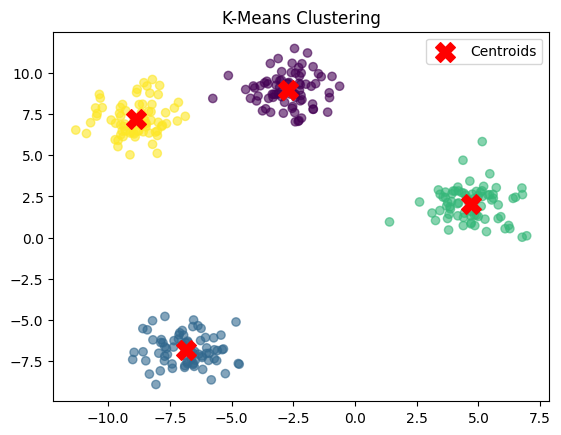

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Predict clusters
labels = kmeans.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.title("K-Means Clustering")
plt.show()

In [ ]:
grid_cv.fit(x_train,y_train)

In [112]:
df1= df[['CashbackAmount','NumberOfAddress']]
df.head()


,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [143]:
df_num = df.select_dtypes(include!='number')

In [157]:
cat_num = df.select_dtypes(include='O')
cat_num.head()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single


In [169]:
cal_corr = df_num.corr().abs()
cal_corr

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,0.010058,0.008264,0.028697,0.160757,0.154118
Tenure,0.349408,1.000000,0.060688,0.018218,0.021226,0.023983,0.013903,0.237666,0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,0.084703,0.060688,1.000000,0.010624,0.009150,0.027934,0.011554,0.029440,0.003375,0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,0.076630,0.018218,0.010624,1.000000,0.060990,0.019071,0.007722,0.011020,0.028696,0.038795,0.003935,0.002681,0.017829,0.009200
HourSpendOnApp,0.018675,0.021226,0.009150,0.060990,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,0.107939,0.023983,0.027934,0.019071,0.316800,1.000000,0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,0.105481,0.013903,0.011554,0.007722,0.031858,0.017228,1.000000,0.053583,0.031115,0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,0.043931,0.237666,0.029440,0.011020,0.145126,0.084997,0.053583,1.000000,0.026399,0.015533,0.042120,0.007609,0.064847,0.186688
Complain,0.250188,0.021268,0.003375,0.028696,0.006976,0.003407,0.031115,0.026399,1.000000,0.004529,0.008174,0.019307,0.043546,0.000525
OrderAmountHikeFromlastYear,0.010058,0.005825,0.031408,0.038795,0.106843,0.069475,0.027730,0.015533,0.004529,1.000000,0.033201,0.023101,0.006003,0.017869


In [166]:
#calculate correlation metrics
cal_corr = df_num.corr().abs()
# Create a mask to ignore self-correlation and duplicates
mask = np.triu(np.ones_like(cal_corr,dtype=bool))
upper_triangle = cal_corr.where(mask)
upper_triangle

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.0,0.349408,0.084703,0.076630,0.018675,0.107939,0.105481,0.043931,0.250188,0.010058,0.008264,0.028697,0.160757,0.154118
Tenure,NaN,1.000000,0.060688,0.018218,0.021226,0.023983,0.013903,0.237666,0.021268,0.005825,0.129035,0.186403,0.184552,0.476380
CityTier,NaN,NaN,1.000000,0.010624,0.009150,0.027934,0.011554,0.029440,0.003375,0.031408,0.021456,0.033388,0.017525,0.055746
WarehouseToHome,NaN,NaN,NaN,1.000000,0.060990,0.019071,0.007722,0.011020,0.028696,0.038795,0.003935,0.002681,0.017829,0.009200
HourSpendOnApp,NaN,NaN,NaN,NaN,1.000000,0.316800,0.031858,0.145126,0.006976,0.106843,0.191528,0.109575,0.075716,0.121490
NumberOfDeviceRegistered,NaN,NaN,NaN,NaN,NaN,1.000000,0.017228,0.084997,0.003407,0.069475,0.151685,0.103464,0.018208,0.137183
SatisfactionScore,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.053583,0.031115,0.027730,0.017936,0.019764,0.032082,0.003473
NumberOfAddress,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.026399,0.015533,0.042120,0.007609,0.064847,0.186688
Complain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.004529,0.008174,0.019307,0.043546,0.000525
OrderAmountHikeFromlastYear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.033201,0.023101,0.006003,0.017869


In [182]:
df1=df_num.corr()

mask = np.triu(np.ones_like(df1, dtype=bool))
upper_triangle = df1.where (mask)

# Set a threshold for multicollinearity (commonly 0.8 or 0.9)
threshold = 0.8
# extract pairs where corellation is above threshold
extracting_pair = [
    (col,row,df1.loc[row,col])
    for col in upper_triangle.columns
    for row in upper_triangle.index
    if not pd.isna(upper_triangle.loc[row,col]) and upper_triangle.loc[row,col] > threshold
    ]


for pair in extracting_pair:
    print(f"{pair[0]} and {pair[1]} have correlation of {pair[2]:.2f}")

plt.figure(figsize=(10,4))
sns.heatmap(extracting_pair,annot=True , cmap='coolwarm')
plt.show()

Churn and Churn have correlation of 1.00
Tenure and Tenure have correlation of 1.00
CityTier and CityTier have correlation of 1.00
WarehouseToHome and WarehouseToHome have correlation of 1.00
HourSpendOnApp and HourSpendOnApp have correlation of 1.00
NumberOfDeviceRegistered and NumberOfDeviceRegistered have correlation of 1.00
SatisfactionScore and SatisfactionScore have correlation of 1.00
NumberOfAddress and NumberOfAddress have correlation of 1.00
Complain and Complain have correlation of 1.00
OrderAmountHikeFromlastYear and OrderAmountHikeFromlastYear have correlation of 1.00
CouponUsed and CouponUsed have correlation of 1.00
OrderCount and OrderCount have correlation of 1.00
DaySinceLastOrder and DaySinceLastOrder have correlation of 1.00
CashbackAmount and CashbackAmount have correlation of 1.00


ValueError: could not convert string to float: np.str_('Churn')

<Figure size 1000x400 with 0 Axes>

In [ ]:
from sklearn.impute import KNNImputer
knnimpute = KNNImputer(n_neighbours=5)
df_data = pd.DataFrame(knnimputer.fit_transform(df),columns=df.columns)

In [140]:
num_col

AttributeError: 'list' object has no attribute 'value'

TypeError: 'str' object is not callable

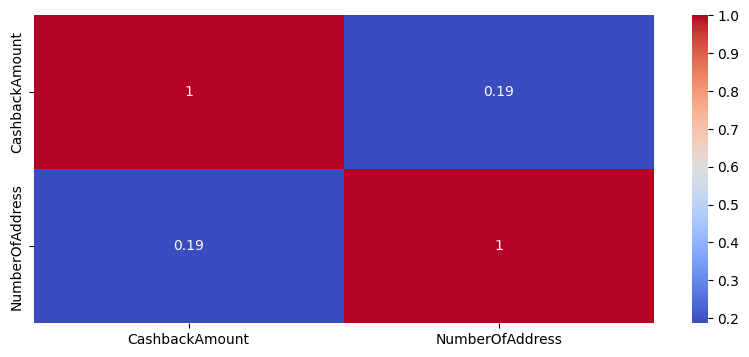

In [118]:
corr = df1.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr , annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
#x=df['Tenure'] y=df['HourSpendOnApp']
#sns.scatter(x=df['Tenure'],y=df['Gender'])
plt.show()